# Scenario 2: random stock vs lognormal supply

In [5]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.gofplots as gofplots
import time

In [6]:
# Record the starting time using the time module
start_time = time.time()

# Assigning mean and standard deviation values for the lognormal distribution
mu, sigma = 3.207, 1.72

# Setting the minimum and maximum values for the uniform distribution
min_value = 0.27
max_value = 8750

In [8]:
# Generating a 100x100 DataFrame of random numbers from a lognormal distribution
# with the specified mean (mu) and standard deviation (sigma)

# figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
# supply_test = pd.DataFrame(np.random.lognormal(mu, sigma, size=(100, 100)))

# Generating a 100x1 DataFrame of random numbers from a uniform distribution
# between min_value and max_value
# stock = pd.DataFrame(np.random.uniform(low=min_value, high=max_value, size=(100,1)))
# stock = pd.DataFrame(stock)
# axes[0].set_title('log Stock')
# axes[1].set_title('log Supply')
# sns.histplot(ax=axes[0],data= stock, palette=['red'], log_scale=True, weights= None)
# sns.histplot(ax=axes[1], data=supply_test.iloc[:, 0], palette=['blue'], log_scale=True, weights=None)
# plt.show()

In [9]:
# In this section of the script, we simulate a fragmentation process applied to whole objects. 
# The objects, represented by the 'stock' DataFrame with a uniform distribution, are fragmented 
# to obtain pieces consistent with the prices of goods. These prices are represented by the 
# 'supply' DataFrame with a log-normal distribution. If the value of an object in 'stock' is 
# greater than or equal to the value of the corresponding object in 'supply', a transaction occurs; 
# otherwise, it does not. The simulation runs for the specified number of times in 'num_simulations', 
# and for each simulation, this operation between 'stock' and 'supply' is attempted a hundred times 
# within the 'for' loop (for i in range(100)). The results of these 'transactions' are saved in the 
# 'consumption' DataFrame, while the 'unspent' items are stored in the 'final_stock' DataFrame.


# Number of simulations to run
num_simulations = 100
#rest = pd.DataFrame(columns=['Iteration'])

# Initialize an empty DataFrame to store consumption data for each iteration
consumption = pd.DataFrame(columns=['Iteration'])

# Initialize an empty DataFrame to store the simulation results
result = pd.DataFrame()

# Initialize an empty DataFrame to store the final stock values for each simulation
final_stock = pd.DataFrame(columns=[f'Final_Stock_{sim}' for sim in range(num_simulations)])

# Loop through each simulation
for sim in range(num_simulations):
    # Generate a new random stock DataFrame for each simulation
    stock = pd.DataFrame(np.random.uniform(low=min_value, high=max_value, size=(100,1)))
    count = 0
    
    # Loop through 100 iterations for each simulation
    for i in range(100):
        # Generate a random supply DataFrame based on the lognormal distribution
        supply = pd.DataFrame(np.random.lognormal(mu, sigma, size=(100, 1)))

        if i == 0:
            # Initialize temporary DataFrames to store consumption data for each iteration
            consumption_temp = pd.DataFrame(columns=['Iteration', f'Consumption_{sim}'])

        # Lists to store consumption values for each iteration and column
        consumption_list= []

        # Iterate through stock DataFrame columns and rows
        for col in supply.columns:
            for idx, row in enumerate(stock.values):
                if (row >= 0.95*supply.iloc[idx, col]) and (row <= 1.05*supply.iloc[idx, col]):
                    stock.iloc[idx,col] = 0
                    consumption_list.append([i,row])
                elif row > supply.iloc[idx, col]:
                    diff = row - supply.iloc[idx, col]
                    stock.iloc[idx,col] = diff
                    consumption_list.append([i,supply.iloc[idx, col]])
                else:
                    stock.iloc[idx,col] = row
                    consumption_list.append([i,0])
                    count+=1

        # Concatenate stock data for each iteration to the result DataFrame
        result_temp = pd.concat([stock], axis=1)
        result_temp.columns = [f'Column_{col}_{sim}' for col in range(result_temp.shape[1])]
        result_temp['Iteration'] = i
        result = pd.concat([result, result_temp], axis=0)

        # Concatenate consumption data for each iteration to temporary DataFrames
        consumption_temp = pd.concat([consumption_temp, pd.DataFrame(consumption_list, columns=['Iteration', f'Consumption_{sim}'])], axis=0)

    # Concatenate consumption data for each simulation to the corresponding DataFrames
    consumption = pd.concat([consumption, consumption_temp.iloc[:,1]], axis=1)
    consumption = consumption.astype(float)
    # Store the final stock values for each simulation in the final_stock DataFrame
    final_stock[f'Final_Stock_{sim}'] = stock.iloc[:,0]
    
    # Print simulation progress
    print(f"Simulation {sim+1}/{num_simulations} completed.")

    




Simulation 1/100 completed.
Simulation 2/100 completed.
Simulation 3/100 completed.
Simulation 4/100 completed.
Simulation 5/100 completed.
Simulation 6/100 completed.
Simulation 7/100 completed.
Simulation 8/100 completed.
Simulation 9/100 completed.
Simulation 10/100 completed.
Simulation 11/100 completed.
Simulation 12/100 completed.
Simulation 13/100 completed.
Simulation 14/100 completed.
Simulation 15/100 completed.
Simulation 16/100 completed.
Simulation 17/100 completed.
Simulation 18/100 completed.
Simulation 19/100 completed.
Simulation 20/100 completed.
Simulation 21/100 completed.
Simulation 22/100 completed.
Simulation 23/100 completed.
Simulation 24/100 completed.
Simulation 25/100 completed.
Simulation 26/100 completed.
Simulation 27/100 completed.
Simulation 28/100 completed.
Simulation 29/100 completed.
Simulation 30/100 completed.
Simulation 31/100 completed.
Simulation 32/100 completed.
Simulation 33/100 completed.
Simulation 34/100 completed.
Simulation 35/100 compl

In [11]:
# Drop the first column from the 'consumption' DataFrame.
consumption = consumption.drop(consumption.columns[0], axis=1)
# Define a function to rename columns of a DataFrame sequentially.
def rename_cols(df):
    new_col_names = {}
    for i, col in enumerate(df.columns):
        new_col_names[col] = str(i)
    df = df.rename(columns=new_col_names)
    return df

# Rename columns of 'consumption' and 'final_stock' DataFrames sequentially.
consumption = rename_cols(consumption)
final_stock = rename_cols(final_stock)

# Concatenate 'consumption' and 'final_stock' DataFrames along rows and ignore index.
final_stock_consumption = pd.concat([consumption, final_stock], ignore_index=True)

In [12]:
# Read data from the Excel file 'DB_SI.xlsx' and store it in the DataFrame 'Arch_data'.
Arch_data = pd.read_excel('DB_SI.xlsx')

In [13]:
# This section of code filters fragmented object weights from the three archaeological phases used in our analysis.
# The weights are then sorted in ascending order, and their logarithms are computed.
# The final result is a numerical series for each phase with fragment weights on a logarithmic scale.

# Filter data for Phase 1 where objects are fragmented and have positive weights.
phase1_real = Arch_data.loc[(Arch_data['Phase'] == 1) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()

# Sort Phase 1 data by 'Weight_obj' in ascending order and reset the index.
phase1_real_sorted = phase1_real.sort_values(by='Weight_obj')
phase1_real_sorted = phase1_real_sorted.reset_index(drop=True)

# Compute logarithm of the sorted Phase 1 weights and store in 'phase1_log'.
phase1_log = np.log(phase1_real_sorted['Weight_obj'])

# Similar operations for Phase 2 and Phase 3 data.
phase2_real = Arch_data.loc[(Arch_data['Phase'] == 2) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()
phase2_real_sorted = phase2_real.sort_values(by='Weight_obj')
phase2_real_sorted = phase2_real_sorted.reset_index(drop=True)
phase2_log = np.log(phase2_real_sorted['Weight_obj'])

phase3_real = Arch_data.loc[(Arch_data['Phase'] == 3) & 
                            (Arch_data['complete/fragmented/undetermined'] == 'fragment') &
                            (Arch_data['Weight_obj'] > 0)].copy()
phase3_real_sorted = phase3_real.sort_values(by='Weight_obj')
phase3_real_sorted = phase3_real_sorted.reset_index(drop=True)
phase3_log = np.log(phase3_real_sorted['Weight_obj'])

In [14]:
# Calculate the mean of the logarithms of weights per Phase
mean_real1 = phase1_log.mean()
mean_real2 = phase2_log.mean()
mean_real3 = phase3_log.mean()

# Calculate the standard deviation of the logarithms of weights per Phase
std_real1 = phase1_log.std()
std_real2 = phase2_log.std()
std_real3 = phase3_log.std()

# Standardize the logarithms of weights per Phase using the calculated mean and standard deviation
phase1_standardized = (phase1_log - mean_real1) / std_real1
phase2_standardized = (phase2_log - mean_real2) / std_real2
phase3_standardized = (phase3_log - mean_real3) / std_real3

Running time: 3364.686623096466 seconds


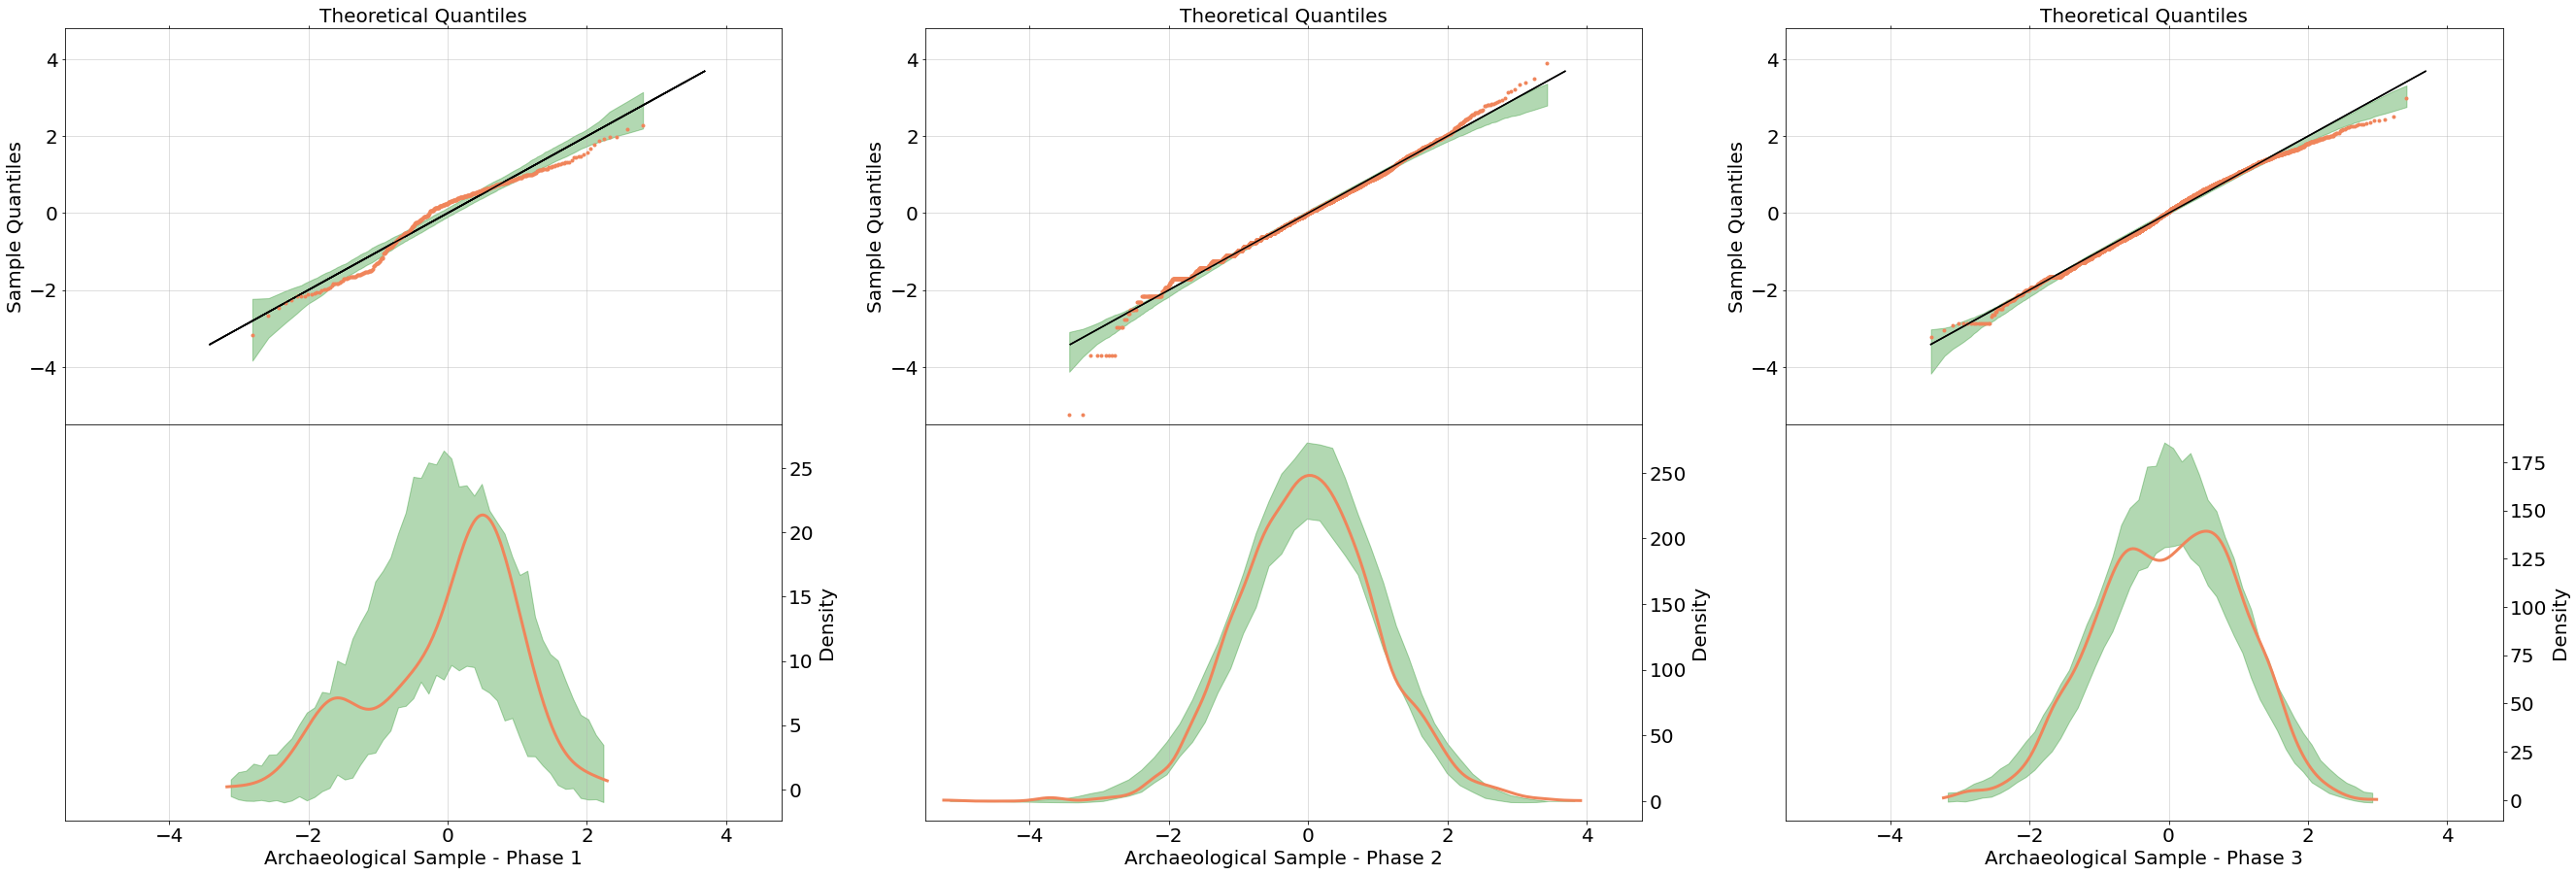

In [16]:
# Create subplots with 2 rows and 3 columns, sharing the same x-axis, and set the figure size.
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(45,15))

# Define the range for logarithmic bins and the number of bins.
bin_range = (np.log(0.1), np.log(100))
num_bin = 50

# Generate logarithmically spaced bins within the specified range.
bins = np.logspace(*bin_range, num=num_bin)

# Initialize empty lists to store random sampling results for each phase.
random_sampling_list_ph1 = []
random_sampling_list_ph2 = []
random_sampling_list_ph3 = []

# Define the number of random samplings based on the length of the respective phases
ph_count_ph1 = len(phase1_log)
ph_count_ph2 = len(phase2_log)
ph_count_ph3 = len(phase3_log)
for_range_qq = 100

# Stack the 'final_stock_consumption' DataFrame, reset the index, and convert to a single-column DataFrame.
united_fsc = final_stock_consumption.stack().reset_index(drop=True).to_frame()

# Drop rows where all values are zero.
united_fsc_dropped = united_fsc[(united_fsc != 0).any(axis=1)]

# Apply logarithm to the non-zero values.
united_fsc_dropped = np.log(united_fsc_dropped)

# Calculate mean and standard deviation of the logged values.
mean_sim_log = united_fsc_dropped.mean()
std_sim_log = united_fsc_dropped.std()

# Standardize the logged values using mean and standard deviation.
united_fsc_dropped_std = (united_fsc_dropped - mean_sim_log) / std_sim_log


qqplot_values_ph1 = []
qqplot_values_ph2 = []
qqplot_values_ph3 = []

# Generate random samples and calculate QQ plot values per Phase
for i in range(for_range_qq):
    prova_ph1=united_fsc_dropped_std.sample(ph_count_ph1)
    prova_sorted_ph1 = prova_ph1.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph1, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph1.append(prova_sorted_ph1)
    
for i in range(for_range_qq):
    prova_ph2=united_fsc_dropped_std.sample(ph_count_ph2)
    prova_sorted_ph2 = prova_ph2.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph2, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph2.append(prova_sorted_ph2)
    
for i in range(for_range_qq):
    prova_ph3=united_fsc_dropped_std.sample(ph_count_ph3)
    prova_sorted_ph3 = prova_ph3.sort_values(by=0).reset_index(drop=True)
    #qqplot_s = gofplots.qqplot(prova_sorted_ph3, line='45', ax=axes[0], alpha=0.0)
    qqplot_values_ph3.append(prova_sorted_ph3)


# Calculate mean and standard deviation of the QQ plot values for each phase
mean_qqplot_values_ph1 = np.mean(qqplot_values_ph1, axis=0)
mean_qqplot_values_ph2 = np.mean(qqplot_values_ph2, axis=0)
mean_qqplot_values_ph3 = np.mean(qqplot_values_ph3, axis=0)
sd_qqvalues_ph1 = np.std(qqplot_values_ph1, axis=0)
sd_qqvalues_ph2 = np.std(qqplot_values_ph2, axis=0)
sd_qqvalues_ph3 = np.std(qqplot_values_ph3, axis=0)
sd2_qqvalues_ph1 = 2*sd_qqvalues_ph1
sd2_qqvalues_ph2 = 2*sd_qqvalues_ph2
sd2_qqvalues_ph3 = 2*sd_qqvalues_ph3
lower_limit_qq_ph1 = mean_qqplot_values_ph1 - sd2_qqvalues_ph1
lower_limit_qq_ph2 = mean_qqplot_values_ph2 - sd2_qqvalues_ph2
lower_limit_qq_ph3 = mean_qqplot_values_ph3 - sd2_qqvalues_ph3
upper_limit_qq_ph1 = mean_qqplot_values_ph1 + sd2_qqvalues_ph1
upper_limit_qq_ph2 = mean_qqplot_values_ph2 + sd2_qqvalues_ph2
upper_limit_qq_ph3 = mean_qqplot_values_ph3 + sd2_qqvalues_ph3

# Plot QQ plots with upper and lower confidence intervals for each phase
qqplot_ul_ph1 = sm.qqplot(upper_limit_qq_ph1, line='45', ax=axes[0, 0])
line_ul_ph1 = axes[0, 0].get_lines()[-1]
line_ul_ph1.set_color('black')
dots_ul_ph1 = axes[0, 0].get_lines()[0]
dots_ul_ph1.set_alpha(0)
line_ul_xdata_ph1 = dots_ul_ph1.get_xdata()
line_ul_ydata_ph1 = dots_ul_ph1.get_ydata()

qqplot_ul_ph2 = sm.qqplot(upper_limit_qq_ph2, line='45', ax=axes[0, 1])
line_ul_ph2 = axes[0, 1].get_lines()[-1]
line_ul_ph2.set_color('black')
dots_ul_ph2 = axes[0, 1].get_lines()[0]
dots_ul_ph2.set_alpha(0)
line_ul_xdata_ph2 = dots_ul_ph2.get_xdata()
line_ul_ydata_ph2 = dots_ul_ph2.get_ydata()

qqplot_ul_ph3 = sm.qqplot(upper_limit_qq_ph3, line='45', ax=axes[0, 2])
line_ul_ph3 = axes[0, 2].get_lines()[-1]
line_ul_ph3.set_color('black')
dots_ul_ph3 = axes[0, 2].get_lines()[0]
dots_ul_ph3.set_alpha(0)
line_ul_xdata_ph3 = dots_ul_ph3.get_xdata()
line_ul_ydata_ph3 = dots_ul_ph3.get_ydata()

# Plot QQ plots with upper and lower confidence intervals for each phase
qqplot_ll_ph1 = sm.qqplot(lower_limit_qq_ph1, line='45', ax=axes[0, 0])
line_ll_ph1 = axes[0, 0].get_lines()[-1]
line_ll_ph1.set_color('black')
dots_ll_ph1 = axes[0, 0].get_lines()[-2]
dots_ll_ph1.set_alpha(0)
line_ll_xdata_ph1 = dots_ll_ph1.get_xdata()
line_ll_ydata_ph1 = dots_ll_ph1.get_ydata()

qqplot_ll_ph2 = sm.qqplot(lower_limit_qq_ph2, line='45', ax=axes[0, 0])
line_ll_ph2 = axes[0, 0].get_lines()[-1]
line_ll_ph2.set_color('black')
dots_ll_ph2 = axes[0, 0].get_lines()[-2]
dots_ll_ph2.set_alpha(0)
line_ll_xdata_ph2 = dots_ll_ph2.get_xdata()
line_ll_ydata_ph2 = dots_ll_ph2.get_ydata()

qqplot_ll_ph3 = sm.qqplot(lower_limit_qq_ph3, line='45', ax=axes[0, 0])
line_ll_ph3 = axes[0, 0].get_lines()[-1]
line_ll_ph3.set_color('black')
dots_ll_ph3 = axes[0, 0].get_lines()[-2]
dots_ll_ph3.set_alpha(0)
line_ll_xdata_ph3 = dots_ll_ph3.get_xdata()
line_ll_ydata_ph3 = dots_ll_ph3.get_ydata()

# QQ plots for standardized data of each Archaeological phase
qqplot_arch_ph1 = sm.qqplot(phase1_standardized, line='45', ax=axes[0, 0], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph1 = axes[0, 0].get_lines()[-1]
line_arch_ph1.set_color('black')

qqplot_arch_ph2 = sm.qqplot(phase2_standardized, line='45', ax=axes[0, 1], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph2 = axes[0, 1].get_lines()[-1]
line_arch_ph2.set_color('black')

qqplot_arch_ph3 = sm.qqplot(phase3_standardized, line='45', ax=axes[0, 2], 
                        marker='o', markerfacecolor='#F0855B', markeredgecolor='none', markersize=4)
line_arch_ph3 = axes[0, 2].get_lines()[-1]
line_arch_ph3.set_color('black')

axes[0, 0].fill_between(line_ul_xdata_ph1, line_ul_ydata_ph1, line_ll_ydata_ph1, color='green', alpha=0.3)
axes[0, 1].fill_between(line_ul_xdata_ph2, line_ul_ydata_ph2, line_ll_ydata_ph2, color='green', alpha=0.3)
axes[0, 2].fill_between(line_ul_xdata_ph3, line_ul_ydata_ph3, line_ll_ydata_ph3, color='green', alpha=0.3)

# Create histograms for each Archaeological phase and plot them
sns.histplot(ax=axes[1, 0], data=phase1_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph1')
values_bin_ph1, bins_real_ph1 = np.histogram(phase1_standardized, bins=num_bin)

sns.histplot(ax=axes[1, 1], data=phase2_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph2')
values_bin_ph2, bins_real_ph2 = np.histogram(phase2_standardized, bins=num_bin)

sns.histplot(ax=axes[1, 2], data=phase3_standardized, legend=False, 
             element='step', kde=True, line_kws={'lw': 3, 'ls': '-'}, 
             bins= num_bin, fill=False, alpha=0, color='#F0855B', label='archaeological fragments Ph3')
values_bin_ph3, bins_real_ph3 = np.histogram(phase3_standardized, bins=num_bin)

# Bootstrap sampling for creating confidence intervals for histograms
for i in range(100):
    random_sampling_ph1 = united_fsc_dropped_std.sample(ph_count_ph1)
    values_random_sampling_ph1, bins_ph1 = np.histogram(random_sampling_ph1, bins=bins_real_ph1)
    random_sampling_list_ph1.append(values_random_sampling_ph1)
    
for i in range(100):
    random_sampling_ph2 = united_fsc_dropped_std.sample(ph_count_ph2)
    values_random_sampling_ph2, bins_ph2 = np.histogram(random_sampling_ph2, bins=bins_real_ph2)
    random_sampling_list_ph2.append(values_random_sampling_ph2)
    
for i in range(100):
    random_sampling_ph3 = united_fsc_dropped_std.sample(ph_count_ph3)
    values_random_sampling_ph3, bins_ph3 = np.histogram(random_sampling_ph3, bins=bins_real_ph3)
    random_sampling_list_ph3.append(values_random_sampling_ph3)
    
# Calculate mean and standard deviation for bootstrap samples    
mean_standardized_bin_ph1 = np.mean(random_sampling_list_ph1, axis=0)
mean_standardized_bin_ph2 = np.mean(random_sampling_list_ph2, axis=0)
mean_standardized_bin_ph3 = np.mean(random_sampling_list_ph3, axis=0)

# Calculate midpoints of bins for each phase
bin_mid_standardized_ph1 = np.mean(np.vstack([bins_real_ph1, np.roll(bins_real_ph1, -1)]), axis=0)[:-1]
bin_mid_standardized_ph2 = np.mean(np.vstack([bins_real_ph2, np.roll(bins_real_ph2, -1)]), axis=0)[:-1]
bin_mid_standardized_ph3 = np.mean(np.vstack([bins_real_ph3, np.roll(bins_real_ph3, -1)]), axis=0)[:-1]

# Calculate standard deviation for bootstrap samples
sd_values_standardized_ph1 = np.std(random_sampling_list_ph1, axis=0)
sd_values_standardized_ph2 = np.std(random_sampling_list_ph2, axis=0)
sd_values_standardized_ph3 = np.std(random_sampling_list_ph3, axis=0)

# Calculate 2-sigma standard deviation for confidence intervals
std_2sigma_standardized_ph1 = 2*sd_values_standardized_ph1
std_2sigma_standardized_ph2 = 2*sd_values_standardized_ph2
std_2sigma_standardized_ph3 = 2*sd_values_standardized_ph3

# Calculate lower and upper limits for confidence intervals
lower_limit_ph1 = mean_standardized_bin_ph1 - std_2sigma_standardized_ph1
lower_limit_ph2 = mean_standardized_bin_ph2 - std_2sigma_standardized_ph2
lower_limit_ph3 = mean_standardized_bin_ph3 - std_2sigma_standardized_ph3
upper_limit_ph1 = mean_standardized_bin_ph1 + std_2sigma_standardized_ph1
upper_limit_ph2 = mean_standardized_bin_ph2 + std_2sigma_standardized_ph2
upper_limit_ph3 = mean_standardized_bin_ph3 + std_2sigma_standardized_ph3

# Fill confidence interval area with green color for each phase
axes[1, 0].fill_between(bin_mid_standardized_ph1, lower_limit_ph1, upper_limit_ph1, color='green', alpha=0.3)
axes[1, 1].fill_between(bin_mid_standardized_ph2, lower_limit_ph2, upper_limit_ph2, color='green', alpha=0.3)
axes[1, 2].fill_between(bin_mid_standardized_ph3, lower_limit_ph3, upper_limit_ph3, color='green', alpha=0.3)

axes[1, 0].grid(axis='x', alpha=0.5)
axes[1, 1].grid(axis='x', alpha=0.5)
axes[1, 2].grid(axis='x', alpha=0.5)
axes[0, 0].grid(True, alpha=0.5)
axes[0, 1].grid(True, alpha=0.5)
axes[0, 2].grid(True, alpha=0.5)
axes[0, 0].spines['bottom'].set_linewidth(0)
axes[0, 1].spines['bottom'].set_linewidth(0)
axes[0, 2].spines['bottom'].set_linewidth(0)
axes[0, 0].xaxis.set_ticks_position('top')
axes[0, 1].xaxis.set_ticks_position('top')
axes[0, 2].xaxis.set_ticks_position('top')
axes[0, 0].xaxis.set_label_position('top')
axes[0, 1].xaxis.set_label_position('top')
axes[0, 2].xaxis.set_label_position('top')
plt.setp(axes[0, 0].get_xticklabels(), visible=False)
plt.setp(axes[0, 1].get_xticklabels(), visible=False)
plt.setp(axes[0, 2].get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=0)
axes[0, 0].set_ylim(-5.5, 4.8)
axes[0, 1].set_ylim(-5.5, 4.8)
axes[0, 2].set_ylim(-5.5, 4.8)
axes[1, 0].yaxis.tick_right() 
axes[1, 0].yaxis.set_label_position('right')
axes[1, 0].set_ylabel('Count',fontsize = 20.0)
axes[1, 1].yaxis.tick_right() 
axes[1, 1].yaxis.set_label_position('right')
axes[1, 1].set_ylabel('Count',fontsize = 20)
axes[1, 2].yaxis.tick_right() 
axes[1, 2].yaxis.set_label_position('right')
axes[1, 2].set_ylabel('Count',fontsize = 20)
axes[1, 2].tick_params(axis='y', labelright=True, labelleft=False)
axes[1, 0].set_xlim(-5.5, 4.8)
axes[1, 1].set_xlim(-5.5, 4.8)
axes[1, 2].set_xlim(-5.5, 4.8)
axes[1, 0].tick_params(axis='x', labelsize=20)
axes[1, 1].tick_params(axis='x', labelsize=20)
axes[1, 2].tick_params(axis='x', labelsize=20)
axes[1, 0].set_ylabel('Density',fontsize = 20)
axes[1, 1].set_ylabel('Density',fontsize = 20)
axes[1, 2].set_ylabel('Density',fontsize = 20)
axes[1, 0].tick_params(axis='y', labelsize=20)
axes[1, 1].tick_params(axis='y', labelsize=20)
axes[1, 2].tick_params(axis='y', labelsize=20)
axes[0, 0].tick_params(axis='y', labelsize=20)
axes[0, 1].tick_params(axis='y', labelsize=20)
axes[0, 2].tick_params(axis='y', labelsize=20)
axes[0, 0].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 0].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[0, 1].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 1].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[0, 2].set_ylabel('Sample Quantiles',fontsize = 20)
axes[0, 2].set_xlabel('Theoretical Quantiles',fontsize = 20)
axes[1, 0].set_xlabel('Archaeological Sample - Phase 1',fontsize = 20)
axes[1, 1].set_xlabel('Archaeological Sample - Phase 2',fontsize = 20) 
axes[1, 2].set_xlabel('Archaeological Sample - Phase 3',fontsize = 20) 


# Save the figure to a file (optional)

# Calculate and print the running time of the script

#plt.savefig('Scenario_2.pdf', format='pdf')
end_time = time.time()
total_time = end_time - start_time
print(f"Running time: {total_time} seconds")
plt.show()